In [1]:
import numpy as np
from scipy import optimize
from scipy.constants import mu_0, epsilon_0
from scipy import fftpack
from scipy import sparse
from scipy.special import factorial
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d, CubicSpline,splrep, BSpline
from scipy.sparse import csr_matrix, csc_matrix
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.linalg import lu_factor, lu_solve
from scipy import signal
import ipywidgets
import empymod
import discretize
import  os


In [2]:
import torch
import torch.nn.functional as F
from torch.autograd.functional import jacobian
eps = torch.finfo(torch.float32).eps
print(eps)

1.1920928955078125e-07


In [3]:
from masa_utils import PsuedoLog
from masa_utils import InducedPolarization
from masa_utils import debye_res_t
from masa_utils_pytorch import Pelton_res_f
from masa_utils_pytorch import Pelton_con_f
from masa_utils_pytorch import InducedPolarizationSimulation
from masa_utils_pytorch import Optimization

In [4]:
res0= 1.0
con8 = 2.0
eta= 0.5
tau= 0.01 #0.001
expc=1.0
parm_true = torch.tensor([np.log(res0), eta, np.log(tau), expc], dtype=torch.float32, requires_grad=False)
ip_model = Pelton_res_f()
sim = InducedPolarizationSimulation(t=True, ip_model=ip_model)
print(sim.ip_model)

In [5]:
logstrt = -4
logend = 0
logstep =0.1
windows_cen = 10**torch.arange(logstrt,logend,logstep)
nwindows = windows_cen.shape[0]
print(windows_cen)
sim.get_windows(windows_cen)
print(sim.windows_strt)
print(sim.windows_end)


tensor([1.0000e-04, 1.2589e-04, 1.5849e-04, 1.9953e-04, 2.5119e-04, 3.1623e-04,
        3.9811e-04, 5.0119e-04, 6.3096e-04, 7.9433e-04, 1.0000e-03, 1.2589e-03,
        1.5849e-03, 1.9953e-03, 2.5119e-03, 3.1623e-03, 3.9811e-03, 5.0119e-03,
        6.3096e-03, 7.9433e-03, 1.0000e-02, 1.2589e-02, 1.5849e-02, 1.9953e-02,
        2.5119e-02, 3.1623e-02, 3.9811e-02, 5.0119e-02, 6.3096e-02, 7.9433e-02,
        1.0000e-01, 1.2589e-01, 1.5849e-01, 1.9953e-01, 2.5119e-01, 3.1623e-01,
        3.9811e-01, 5.0119e-01, 6.3096e-01, 7.9433e-01])
tensor([2.2204e-15, 1.1295e-04, 1.4219e-04, 1.7901e-04, 2.2536e-04, 2.8371e-04,
        3.5717e-04, 4.4965e-04, 5.6607e-04, 7.1264e-04, 8.9716e-04, 1.1295e-03,
        1.4219e-03, 1.7901e-03, 2.2536e-03, 2.8371e-03, 3.5717e-03, 4.4965e-03,
        5.6607e-03, 7.1264e-03, 8.9716e-03, 1.1295e-02, 1.4219e-02, 1.7901e-02,
        2.2536e-02, 2.8371e-02, 3.5717e-02, 4.4965e-02, 5.6607e-02, 7.1264e-02,
        8.9716e-02, 1.1295e-01, 1.4219e-01, 1.7901e-01, 2.2536e

In [6]:
dpred = sim.dpred(parm_true)
dt = (sim.times[1]-sim.times[0]).detach().numpy()
dpred_plot= dpred.detach().numpy()
dpred_plot[0]*=dt

print(dpred_plot)


tensor([2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
        9.0000e+00, 1.2000e+01, 1.5000e+01, 1.9000e+01, 2.4000e+01, 2.9000e+01,
        3.8000e+01, 4.7000e+01, 6.0000e+01, 7.5000e+01, 9.4000e+01, 1.1800e+02,
        1.5000e+02, 1.8800e+02, 2.3700e+02, 2.9800e+02, 3.7500e+02, 4.7200e+02,
        5.9500e+02, 7.4900e+02, 9.4200e+02, 1.1870e+03, 1.4930e+03, 1.8810e+03,
        2.3670e+03, 2.9810e+03, 3.7520e+03, 4.1820e+03])


[ 5.0048810e-01  5.0398975e+01  4.9309738e+01  4.9141914e+01
  4.8962147e+01  4.8615234e+01  4.8423874e+01  4.8039776e+01
  4.7485199e+01  4.6927719e+01  4.6166695e+01  4.5215431e+01
  4.4035053e+01  4.2606274e+01  4.0852177e+01  3.8755753e+01
  3.6303162e+01  3.3417191e+01  3.0107510e+01  2.6423058e+01
  2.2393602e+01  1.8184988e+01  1.4002416e+01  1.0086413e+01
  6.6822395e+00  3.9799407e+00  2.0756862e+00  9.1695452e-01
  3.2914931e-01  9.1293633e-02  1.8340981e-02  2.4645703e-03
  2.0156329e-04  9.5220748e-06 -1.2182863e-07  2.3095345e-07
  1.5877595e-07  2.4258770e-07 -4.2081228e-07  2.8216164e-08
  2.4601559e-07]


In [7]:
window_mat = sim.window_mat
print(sim.window_mat)

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [8]:
dpred_J =sim.J(parm_true)
J_plot = dpred_J.detach().numpy()
J_plot[0,:] *=dt
print(J_plot)

tensor([2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
        9.0000e+00, 1.2000e+01, 1.5000e+01, 1.9000e+01, 2.4000e+01, 2.9000e+01,
        3.8000e+01, 4.7000e+01, 6.0000e+01, 7.5000e+01, 9.4000e+01, 1.1800e+02,
        1.5000e+02, 1.8800e+02, 2.3700e+02, 2.9800e+02, 3.7500e+02, 4.7200e+02,
        5.9500e+02, 7.4900e+02, 9.4200e+02, 1.1870e+03, 1.4930e+03, 1.8810e+03,
        2.3670e+03, 2.9810e+03, 3.7520e+03, 4.1820e+03])
[[ 5.00488043e-01 -9.99023855e-01 -4.87894780e-04 -3.60184209e-03]
 [ 5.03989563e+01  1.00797760e+02 -5.01082878e+01 -2.37536987e+02]
 [ 4.93097916e+01  9.86192322e+01 -4.86830864e+01 -1.83152832e+02]
 [ 4.91419067e+01  9.82835846e+01 -4.83255539e+01 -1.68478043e+02]
 [ 4.89621696e+01  9.79245529e+01 -4.79576416e+01 -1.56687790e+02]
 [ 4.86151772e+01  9.72303238e+01 -4.73776588e+01 -1.43758820e+02]
 [ 4.84238319e+01  9.68476639e+01 -4.68638725e+01 -1.30983963

#Pot

In [ ]:
freq_plot = np.r_[0,windows_cen.detach().numpy()]
print(windows_plot)

[0.0000000e+00 9.9999997e-05 1.2589252e-04 1.5848933e-04 1.9952621e-04
 2.5118870e-04 3.1622776e-04 3.9810708e-04 5.0118729e-04 6.3095725e-04
 7.9432799e-04 1.0000000e-03 1.2589252e-03 1.5848933e-03 1.9952620e-03
 2.5118857e-03 3.1622776e-03 3.9810711e-03 5.0118701e-03 6.3095726e-03
 7.9432800e-03 9.9999998e-03 1.2589252e-02 1.5848929e-02 1.9952621e-02
 2.5118863e-02 3.1622775e-02 3.9810721e-02 5.0118715e-02 6.3095726e-02
 7.9432823e-02 1.0000000e-01 1.2589253e-01 1.5848932e-01 1.9952624e-01
 2.5118864e-01 3.1622776e-01 3.9810717e-01 5.0118721e-01 6.3095737e-01
 7.9432821e-01]


# code for numpy

In [10]:
sim_debye = debye_res_t(times=windows_plot)
p = np.r_[np.log(res0),eta,np.log(tau)]
dpred_debye = sim_debye.t(p)
dpred_debye_grad = sim_debye.t_grad(p)
print(dpred_debye_grad.shape)
print(dpred_debye.shape)

(41, 3)
(41,)


In [11]:
sim_debye = debye_res_t(times=sim.times)
window_mat = sim.window_mat.detach().numpy()
dpred_debye = window_mat@sim_debye.t(p)
dpred_debye_grad = window_mat@sim_debye.t_grad(p)
print(dpred_debye_grad.shape)
print(dpred_debye.shape)

(41, 3)
(41,)


# Plot

In [ ]:
PL_pelton = PsuedoLog(
            logmin=1e0,
            linScale=1.0,
            logminx=10.**np.floor(np.log10(windows_plot[windows_plot>eps].min())),
            linScalex=0.1)
PL_jac = PsuedoLog(
            logmin=1e0,
            linScale=1.0,
            logminx=10.**np.floor(np.log10(windows_plot[freq_plot>eps].min())),
            linScalex=0.1)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


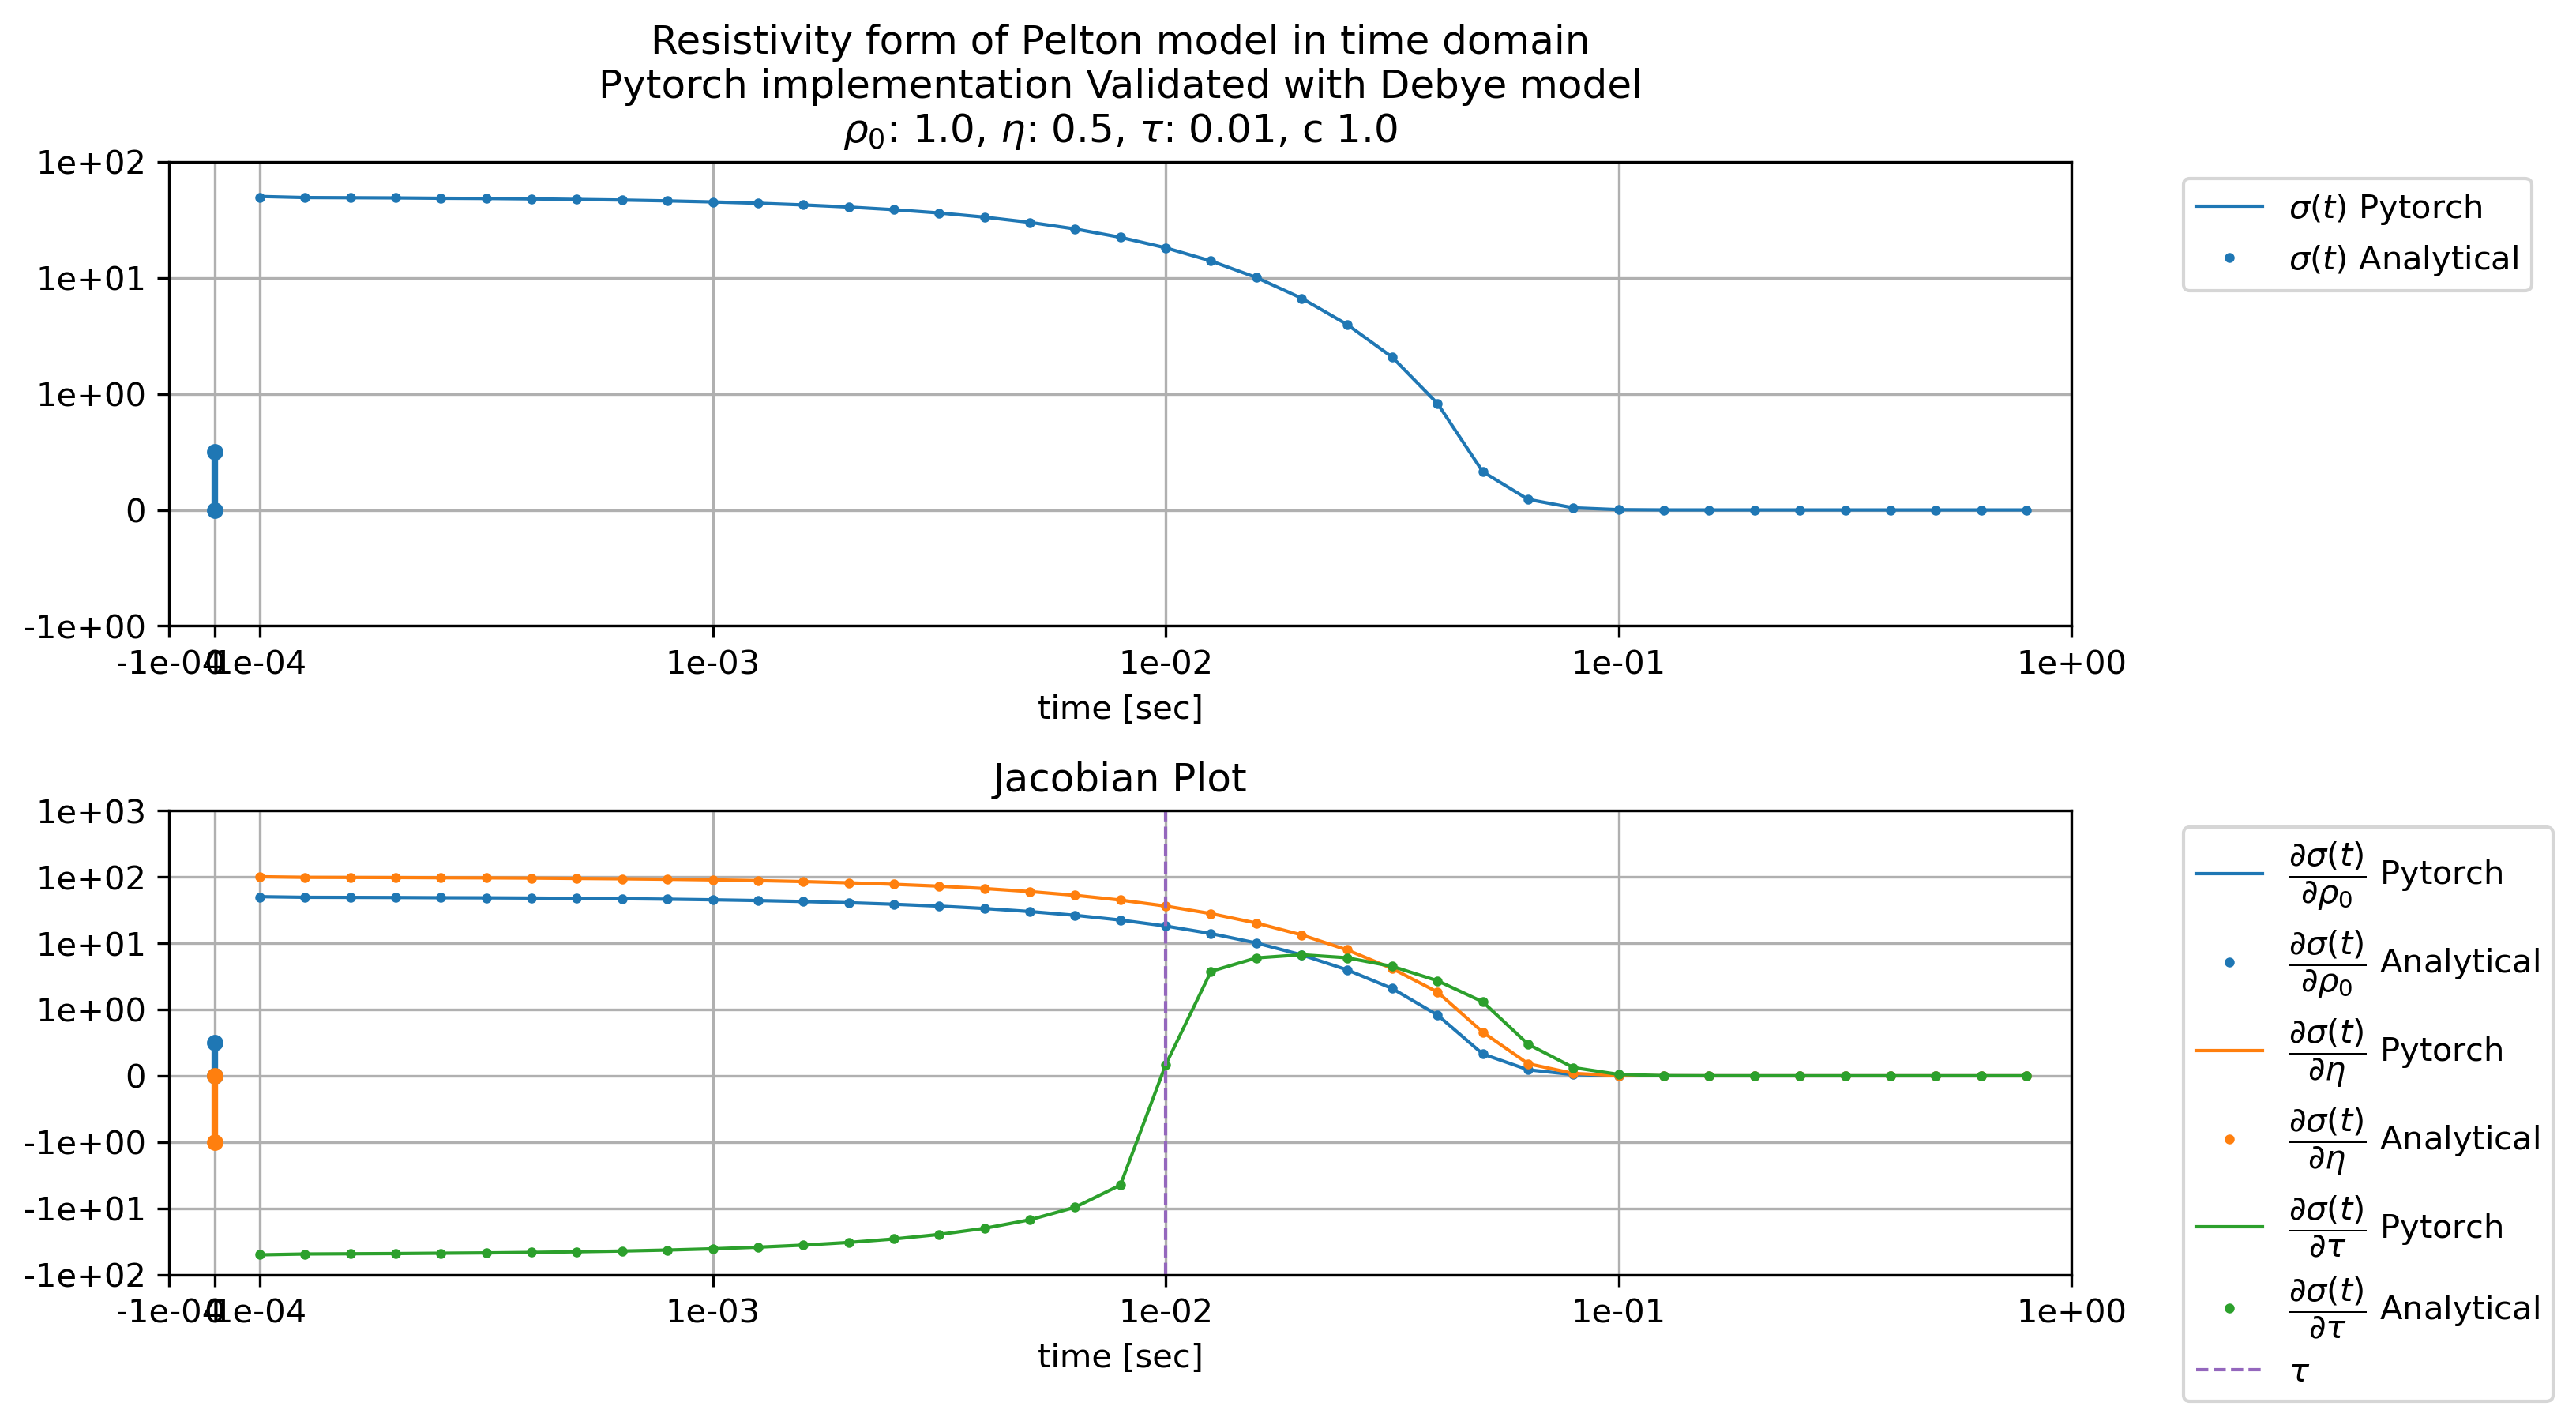

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11, 6),dpi=300)
ax[0] = PL_pelton.plpl_plot(x=np.r_[0,0], y=np.r_[0,dpred_plot[0]], ax=ax[0], 
                linewidth=2.0,  color="C0") 
ax[0] = PL_pelton.plpl_plot(x=np.r_[0,0], y=np.r_[0, dpred_debye[0] ], ax=ax[0], 
                linestyle="", color="C0", marker='o',  markersize=4) 
ax[0] = PL_pelton.plpl_plot(x=windows_plot[1:], y=dpred_plot[1:], ax=ax[0],
                  color = "C0",label=r"$\sigma(t)$ Pytorch")
ax[0] = PL_pelton.plpl_plot(x=freq_plot[1:], y=dpred_debye[1:], ax=ax[0],
                  color = "C0",marker=".",markersize=4,linestyle="",label=r"$\sigma(t)$ Analytical")
PL_pelton.pl_axes(ax=ax[0])
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,J_plot[0,0]], ax=ax[1], 
                linewidth=2.0,  color="C0" ) 
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,dpred_debye_grad[0,0]], ax=ax[1], 
                linestyle="",  color="C0", marker='o', markersize=4) 
ax[1] = PL_jac.plpl_plot(x=freq_plot[1:], y=J_plot[1:,0], ax=ax[1],
                 color = "C0",label=r"$\dfrac{\partial\sigma(t)}{\partial\rho_0}$ Pytorch")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=dpred_debye_grad[1:,0], ax=ax[1],
        color = "C0",marker=".",markersize=4, linestyle="",
        label=r"$\dfrac{\partial\sigma(t)}{\partial\rho_0}$ Analytical")
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,J_plot[0,1]], ax=ax[1],
                linewidth=2.0, color = "C1")
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,dpred_debye_grad[0,1],], ax=ax[1],
                linestyle="", color = "C1",marker='o', markersize=4)
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,1], ax=ax[1],
                color = "C1",label=r"$\dfrac{\partial\sigma(t)}{\partial\eta}$ Pytorch")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=dpred_debye_grad[1:,1], ax=ax[1],
        color = "C1",marker=".",markersize=4, linestyle="",
        label=r"$\dfrac{\partial\sigma(t)}{\partial\eta}$ Analytical")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,2], ax=ax[1],
                color = "C2",label=r"$\dfrac{\partial\sigma(t)}{\partial\tau}$ Pytorch")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=dpred_debye_grad[1:,2], ax=ax[1],
        color = "C2",marker=".",markersize=4, linestyle="",
        label=r"$\dfrac{\partial\sigma(t)}{\partial\tau}$ Analytical")
ax[1] = PL_jac.pl_axvline(ax=ax[1], x=tau, color="C4",label=r'$\tau$')
PL_jac.pl_axes(ax=ax[1])
PL_jac.pl_axes_x(ax=ax[1])
for a in ax:
        a.set_xlabel('time [sec]')
        a.grid(which='both')
        a.legend()
        a.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].set_title(fr"""Resistivity form of Pelton model in time domain
Pytorch implementation Validated with Debye model
$\rho_0$: {res0}, $\eta$: {eta}, $\tau$: {tau}, c {expc}""")
ax[1].set_title('Jacobian Plot')
plt.tight_layout()

# SVD on Conductivity form with differen time range

In [14]:
con8 = 5.0
eta= 0.5
tau= 0.01 
expc= 0.5
parm = torch.tensor([np.log(con8), eta, np.log(tau), expc], dtype=torch.float32, requires_grad=True)
ip_model = Pelton_con_f()
sim = InducedPolarizationSimulation(t=True, ip_model=ip_model)
print(sim.ip_model)

In [69]:
logstrt = -4
logend = 0
logstep =0.1
windows_cen = 10**torch.arange(logstrt,logend,logstep)
#windows_cen = torch.arange(10**logstrt, 10**logend, 1e-4)
nwindows = windows_cen.shape[0]
print(windows_cen)
sim.get_windows(windows_cen)
print(sim.windows_strt)
print(sim.windows_end)
windows_plot = np.r_[0,windows_cen.detach().numpy()]
print(windows_plot)

tensor([1.0000e-04, 1.2589e-04, 1.5849e-04, 1.9953e-04, 2.5119e-04, 3.1623e-04,
        3.9811e-04, 5.0119e-04, 6.3096e-04, 7.9433e-04, 1.0000e-03, 1.2589e-03,
        1.5849e-03, 1.9953e-03, 2.5119e-03, 3.1623e-03, 3.9811e-03, 5.0119e-03,
        6.3096e-03, 7.9433e-03, 1.0000e-02, 1.2589e-02, 1.5849e-02, 1.9953e-02,
        2.5119e-02, 3.1623e-02, 3.9811e-02, 5.0119e-02, 6.3096e-02, 7.9433e-02,
        1.0000e-01, 1.2589e-01, 1.5849e-01, 1.9953e-01, 2.5119e-01, 3.1623e-01,
        3.9811e-01, 5.0119e-01, 6.3096e-01, 7.9433e-01])
tensor([2.2204e-15, 1.1295e-04, 1.4219e-04, 1.7901e-04, 2.2536e-04, 2.8371e-04,
        3.5717e-04, 4.4965e-04, 5.6607e-04, 7.1264e-04, 8.9716e-04, 1.1295e-03,
        1.4219e-03, 1.7901e-03, 2.2536e-03, 2.8371e-03, 3.5717e-03, 4.4965e-03,
        5.6607e-03, 7.1264e-03, 8.9716e-03, 1.1295e-02, 1.4219e-02, 1.7901e-02,
        2.2536e-02, 2.8371e-02, 3.5717e-02, 4.4965e-02, 5.6607e-02, 7.1264e-02,
        8.9716e-02, 1.1295e-01, 1.4219e-01, 1.7901e-01, 2.2536e

In [70]:
dpred = sim.dpred(parm)
dpred_J = sim.J(parm)
dpred_plot= dpred.detach().numpy()
J_plot = dpred_J.detach().numpy()

print(J_plot)

tensor([2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
        9.0000e+00, 1.2000e+01, 1.5000e+01, 1.9000e+01, 2.4000e+01, 2.9000e+01,
        3.8000e+01, 4.7000e+01, 6.0000e+01, 7.5000e+01, 9.4000e+01, 1.1800e+02,
        1.5000e+02, 1.8800e+02, 2.3700e+02, 2.9800e+02, 3.7500e+02, 4.7200e+02,
        5.9500e+02, 7.4900e+02, 9.4200e+02, 1.1870e+03, 1.4930e+03, 1.8810e+03,
        2.3670e+03, 2.9810e+03, 3.7520e+03, 4.1820e+03])
tensor([2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
        9.0000e+00, 1.2000e+01, 1.5000e+01, 1.9000e+01, 2.4000e+01, 2.9000e+01,
        3.8000e+01, 4.7000e+01, 6.0000e+01, 7.5000e+01, 9.4000e+01, 1.1800e+02,
        1.5000e+02, 1.8800e+02, 2.3700e+02, 2.9800e+02, 3.7500e+02, 4.7200e+02,
        5.9500e+02, 7.4900e+02, 9.4200e+02, 1.1870e+03, 1.4930e

In [71]:
# sim_times = sim.times.detach().numpy()
# sim_times_resmp = torch.tensor(sim_times[1::10])
# print(len(sim_times_resmp))
# sim.get_windows(sim_times_resmp)
# dpred = sim.dpred(parm)
# dpred_J = sim.J(parm)
# dpred_plot= dpred.detach().numpy()
# J_plot = dpred_J.detach().numpy()
# print(J_plot)

In [72]:
dt =(sim.times[1]-sim.times[0]).detach().numpy()
print(dt)
J_t = J_plot.copy()
J_s = J_t[windows_plot<tau-eps,:].copy()


1.953125e-05


In [73]:
dpred_plot[0] *= dt
J_plot[0,:] *= dt
print(dpred_plot)

[ 4.8330326e+00 -3.5012954e+03 -1.7033577e+03 -1.4178289e+03
 -1.2211655e+03 -1.0157235e+03 -8.8070984e+02 -7.4031061e+02
 -6.0076007e+02 -5.0846445e+02 -4.1846167e+02 -3.3763693e+02
 -2.7035272e+02 -2.1770197e+02 -1.7134946e+02 -1.3440433e+02
 -1.0465915e+02 -8.0989777e+01 -6.2033218e+01 -4.7014030e+01
 -3.5434502e+01 -2.6400389e+01 -1.9596121e+01 -1.4445580e+01
 -1.0595932e+01 -7.7169714e+00 -5.6031928e+00 -4.0515661e+00
 -2.9212317e+00 -2.1023564e+00 -1.5112003e+00 -1.0850236e+00
 -7.7989763e-01 -5.6139189e-01 -4.0511981e-01 -2.9379600e-01
 -2.1428043e-01 -1.5763031e-01 -1.1713928e-01 -8.8189043e-02
 -6.8318553e-02]


In [74]:
PL_pelton = PsuedoLog(
            logmin=1e1,
            linScale=1.0,
            logminx=10.**np.floor(np.log10(windows_plot[windows_plot>eps].min())),
            linScalex=0.1)
PL_jac = PsuedoLog(
            logmin=1e1,
            linScale=1.0,
            logminx=10.**np.floor(np.log10(windows_plot[windows_plot>eps].min())),
            linScalex=0.1)

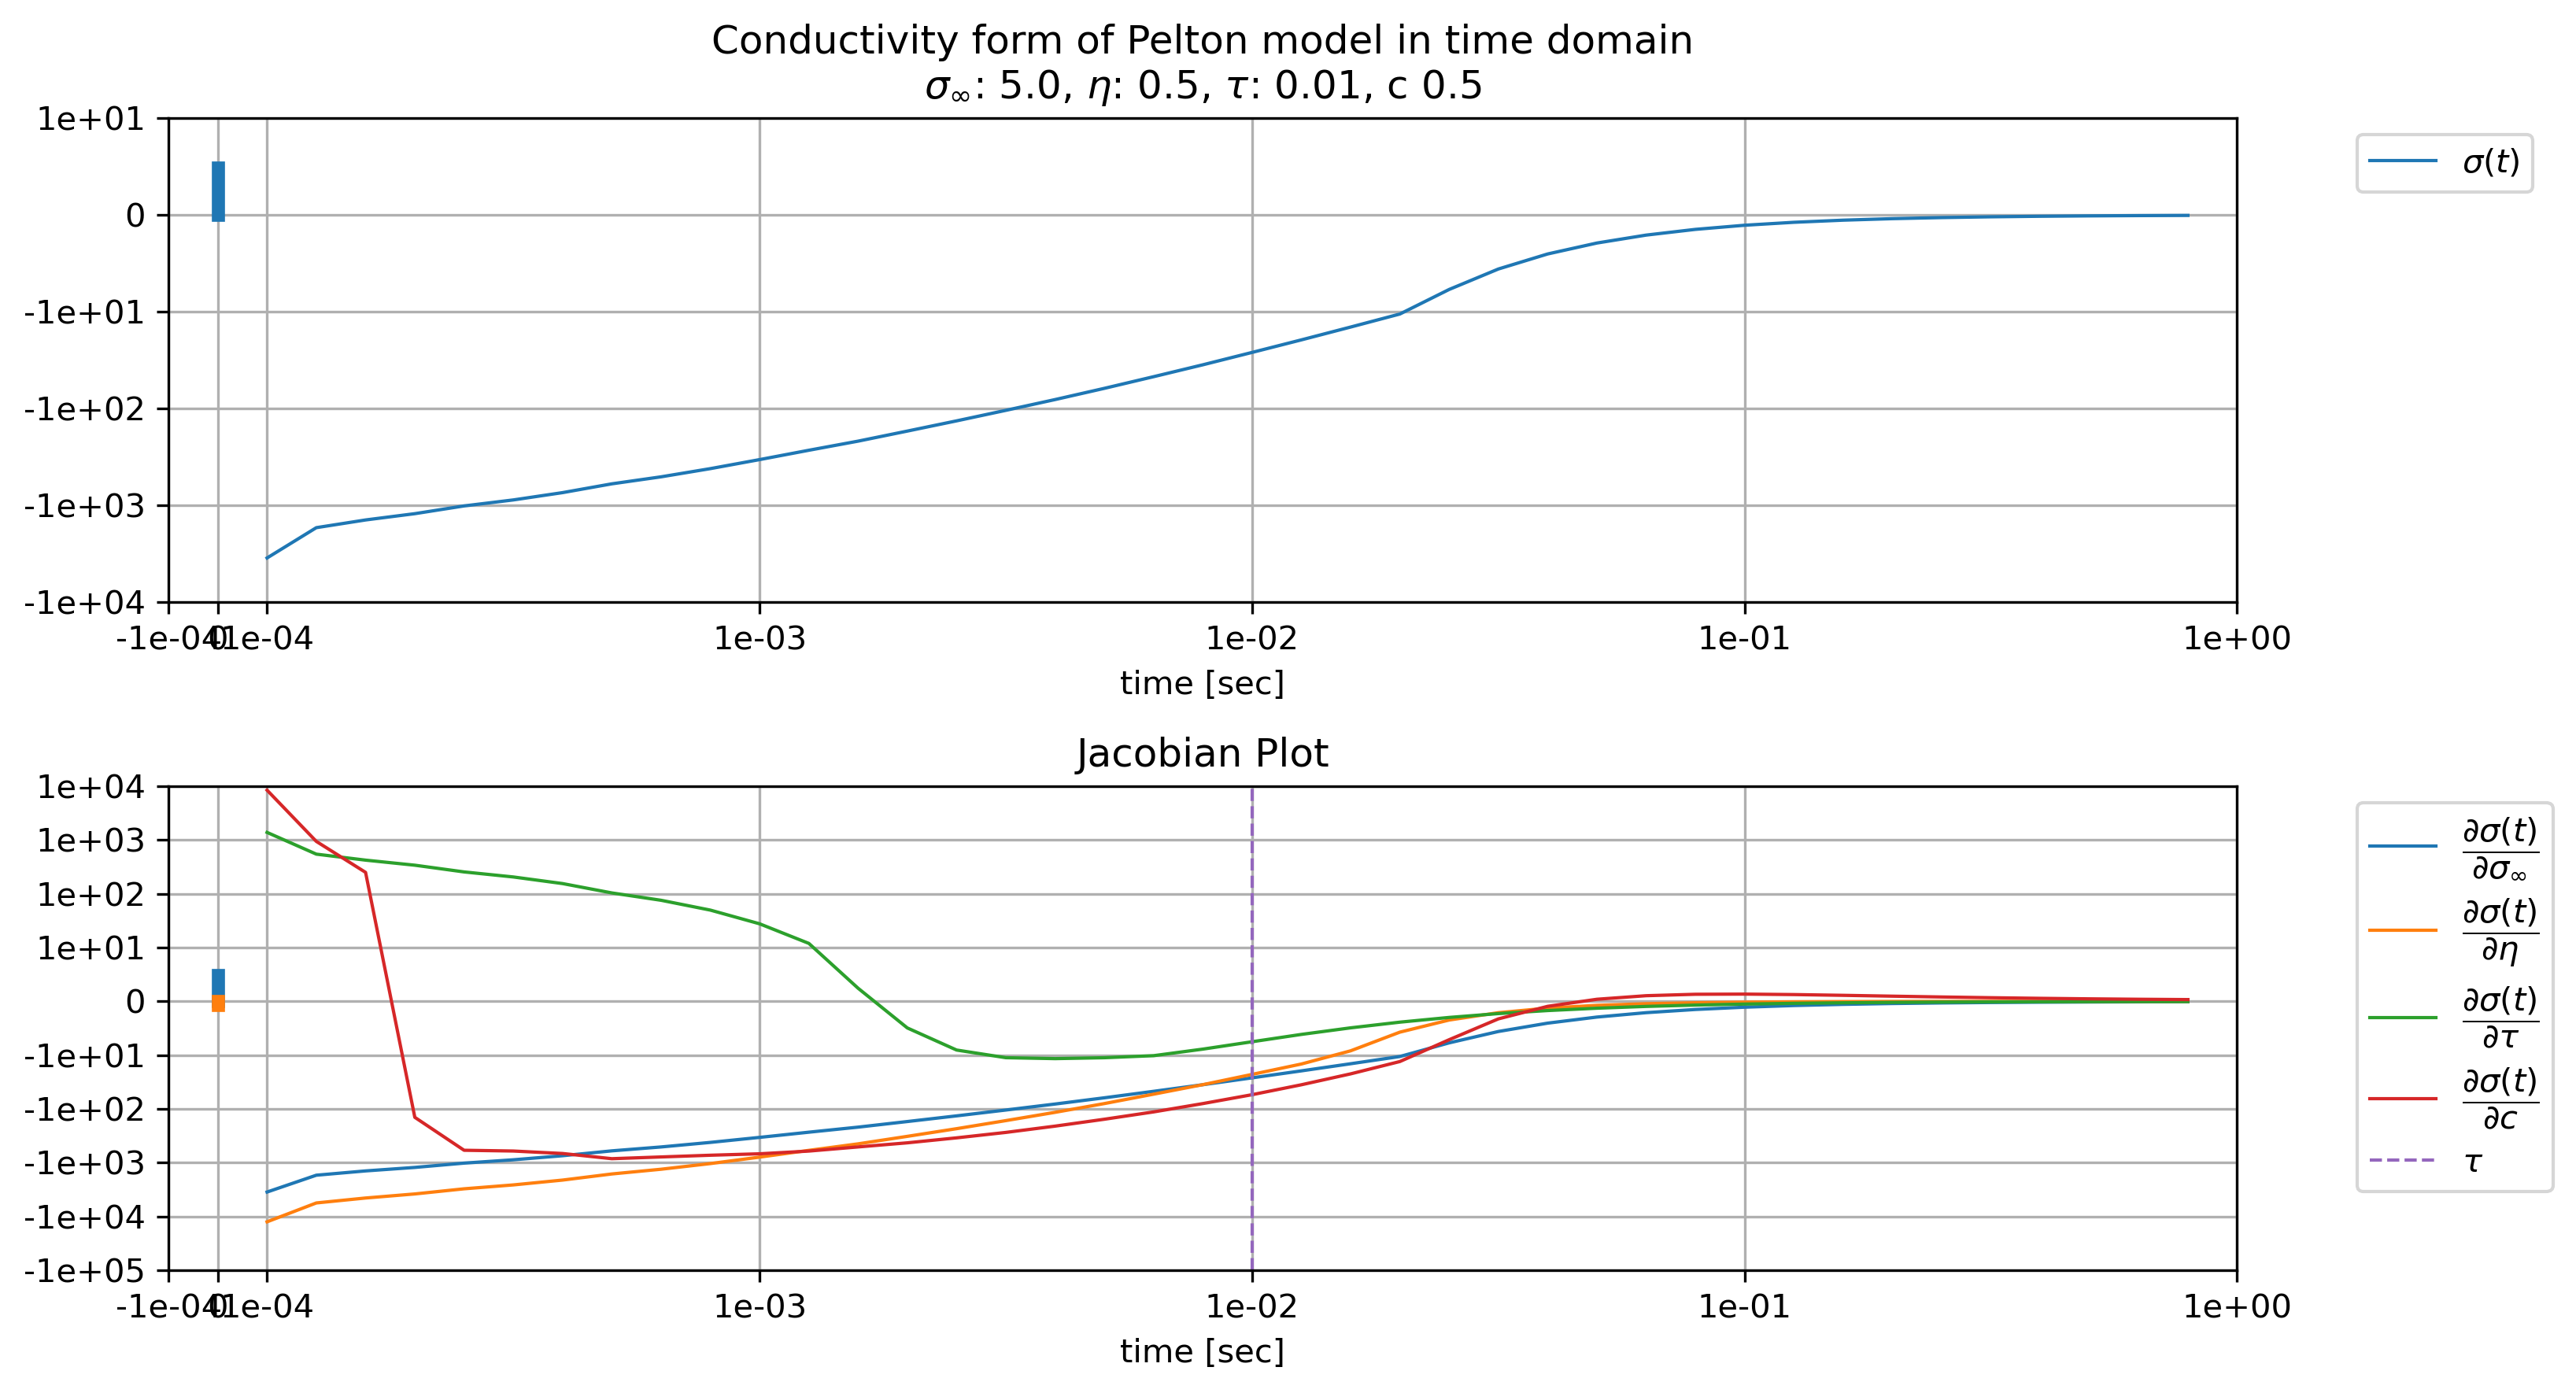

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(11, 6),dpi=300)
ax[0] = PL_pelton.plpl_plot(x=np.r_[0,0], y=np.r_[0,dpred_plot[0]], ax=ax[0], 
                linewidth=4.0,  color="C0") 
ax[0] = PL_pelton.plpl_plot(x=windows_plot[1:], y=dpred_plot[1:], ax=ax[0],
                  color = "C0",label=r"$\sigma(t)$")
PL_pelton.pl_axes(ax=ax[0])
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,J_plot[0,0]], ax=ax[1], 
                linewidth=4.0,  color="C0" ) 
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,0], ax=ax[1],
                 color = "C0",label=r"$\dfrac{\partial\sigma(t)}{\partial\sigma_\infty}$")
ax[1] = PL_jac.plpl_plot(x=np.r_[0,0], y=np.r_[0,J_plot[0,1]], ax=ax[1],
                linewidth=4.0, color = "C1")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,1], ax=ax[1],
                color = "C1",label=r"$\dfrac{\partial\sigma(t)}{\partial\eta}$")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,2], ax=ax[1],
                color = "C2",label=r"$\dfrac{\partial\sigma(t)}{\partial\tau}$")
ax[1] = PL_jac.plpl_plot(x=windows_plot[1:], y=J_plot[1:,3], ax=ax[1],
                color = "C3",label=r"$\dfrac{\partial\sigma(t)}{\partial c}$")
ax[1] = PL_jac.pl_axvline(ax=ax[1], x=tau, color="C4",label=r'$\tau$')

PL_jac.pl_axes(ax=ax[1])
PL_jac.pl_axes_x(ax=ax[1])
for a in ax:
        a.set_xlabel('time [sec]')
#        a.set_ylabel('Amplitude')
        a.grid(which='both')
        a.legend()
        a.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

        # a.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)
#        plt.tight_layout(rect=[0, 0.1, 1, 1])
ax[0].set_title(fr"""Conductivity form of Pelton model in time domain
$\sigma_\infty$: {con8}, $\eta$: {eta}, $\tau$: {tau}, c {expc}""")
ax[1].set_title('Jacobian Plot')
plt.tight_layout()

In [76]:
U, S_l, Vh = np.linalg.svd(J_l)
print(S_l)

[2.5589791e+05 1.7894578e+04 5.2062261e+03 6.5058784e+01]


In [77]:

U, S_s, Vh = np.linalg.svd(J_s)
print(S_s)

[2.5589791e+05 1.7894576e+04 5.2057563e+03 6.3830734e+01]


# Spectrul IP

In [78]:
freq_strt = 1e-1
freq_end = 1e5
freq_log_stp = 0.1
freq = 10**np.arange(np.log10(freq_strt),np.log10(freq_end)+freq_log_stp,freq_log_stp)
freq = torch.tensor(freq, dtype=torch.float32)
print(freq)
freq_plot = freq.detach().numpy()

tensor([1.0000e-01, 1.2589e-01, 1.5849e-01, 1.9953e-01, 2.5119e-01, 3.1623e-01,
        3.9811e-01, 5.0119e-01, 6.3096e-01, 7.9433e-01, 1.0000e+00, 1.2589e+00,
        1.5849e+00, 1.9953e+00, 2.5119e+00, 3.1623e+00, 3.9811e+00, 5.0119e+00,
        6.3096e+00, 7.9433e+00, 1.0000e+01, 1.2589e+01, 1.5849e+01, 1.9953e+01,
        2.5119e+01, 3.1623e+01, 3.9811e+01, 5.0119e+01, 6.3096e+01, 7.9433e+01,
        1.0000e+02, 1.2589e+02, 1.5849e+02, 1.9953e+02, 2.5119e+02, 3.1623e+02,
        3.9811e+02, 5.0119e+02, 6.3096e+02, 7.9433e+02, 1.0000e+03, 1.2589e+03,
        1.5849e+03, 1.9953e+03, 2.5119e+03, 3.1623e+03, 3.9811e+03, 5.0119e+03,
        6.3096e+03, 7.9433e+03, 1.0000e+04, 1.2589e+04, 1.5849e+04, 1.9953e+04,
        2.5119e+04, 3.1623e+04, 3.9811e+04, 5.0119e+04, 6.3096e+04, 7.9433e+04,
        1.0000e+05])


In [79]:
ip_model = Pelton_con_f(freq=freq)
sim_f = InducedPolarizationSimulation(t=False, ip_model=ip_model)
dpred_f = sim_f.dpred(parm)
J_f = sim_f.J(parm)
dpred_f_plot = dpred_f.detach().numpy()
dpred_f_plot_real = dpred_f_plot[:len(freq)]
dpred_f_plot_imag = dpred_f_plot[len(freq):]
J_f_plot = J_f.detach().numpy()
J_f_plot_real = J_f_plot[:len(freq),:]
J_f_plot_imag = J_f_plot[len(freq):,:]

In [80]:
PL_pelton = PsuedoLog(
            logmin=1e-7,
            linScale=0.2,
            logminx=10.**np.floor(np.log10(freq_plot[freq_plot>eps].min())),
            linScalex=0.2)
PL_jac = PsuedoLog(
            logmin=1e-7,
            linScale=0.2,
            logminx=10.**np.floor(np.log10(freq_plot[freq_plot>eps].min())),
            linScalex=0.2)

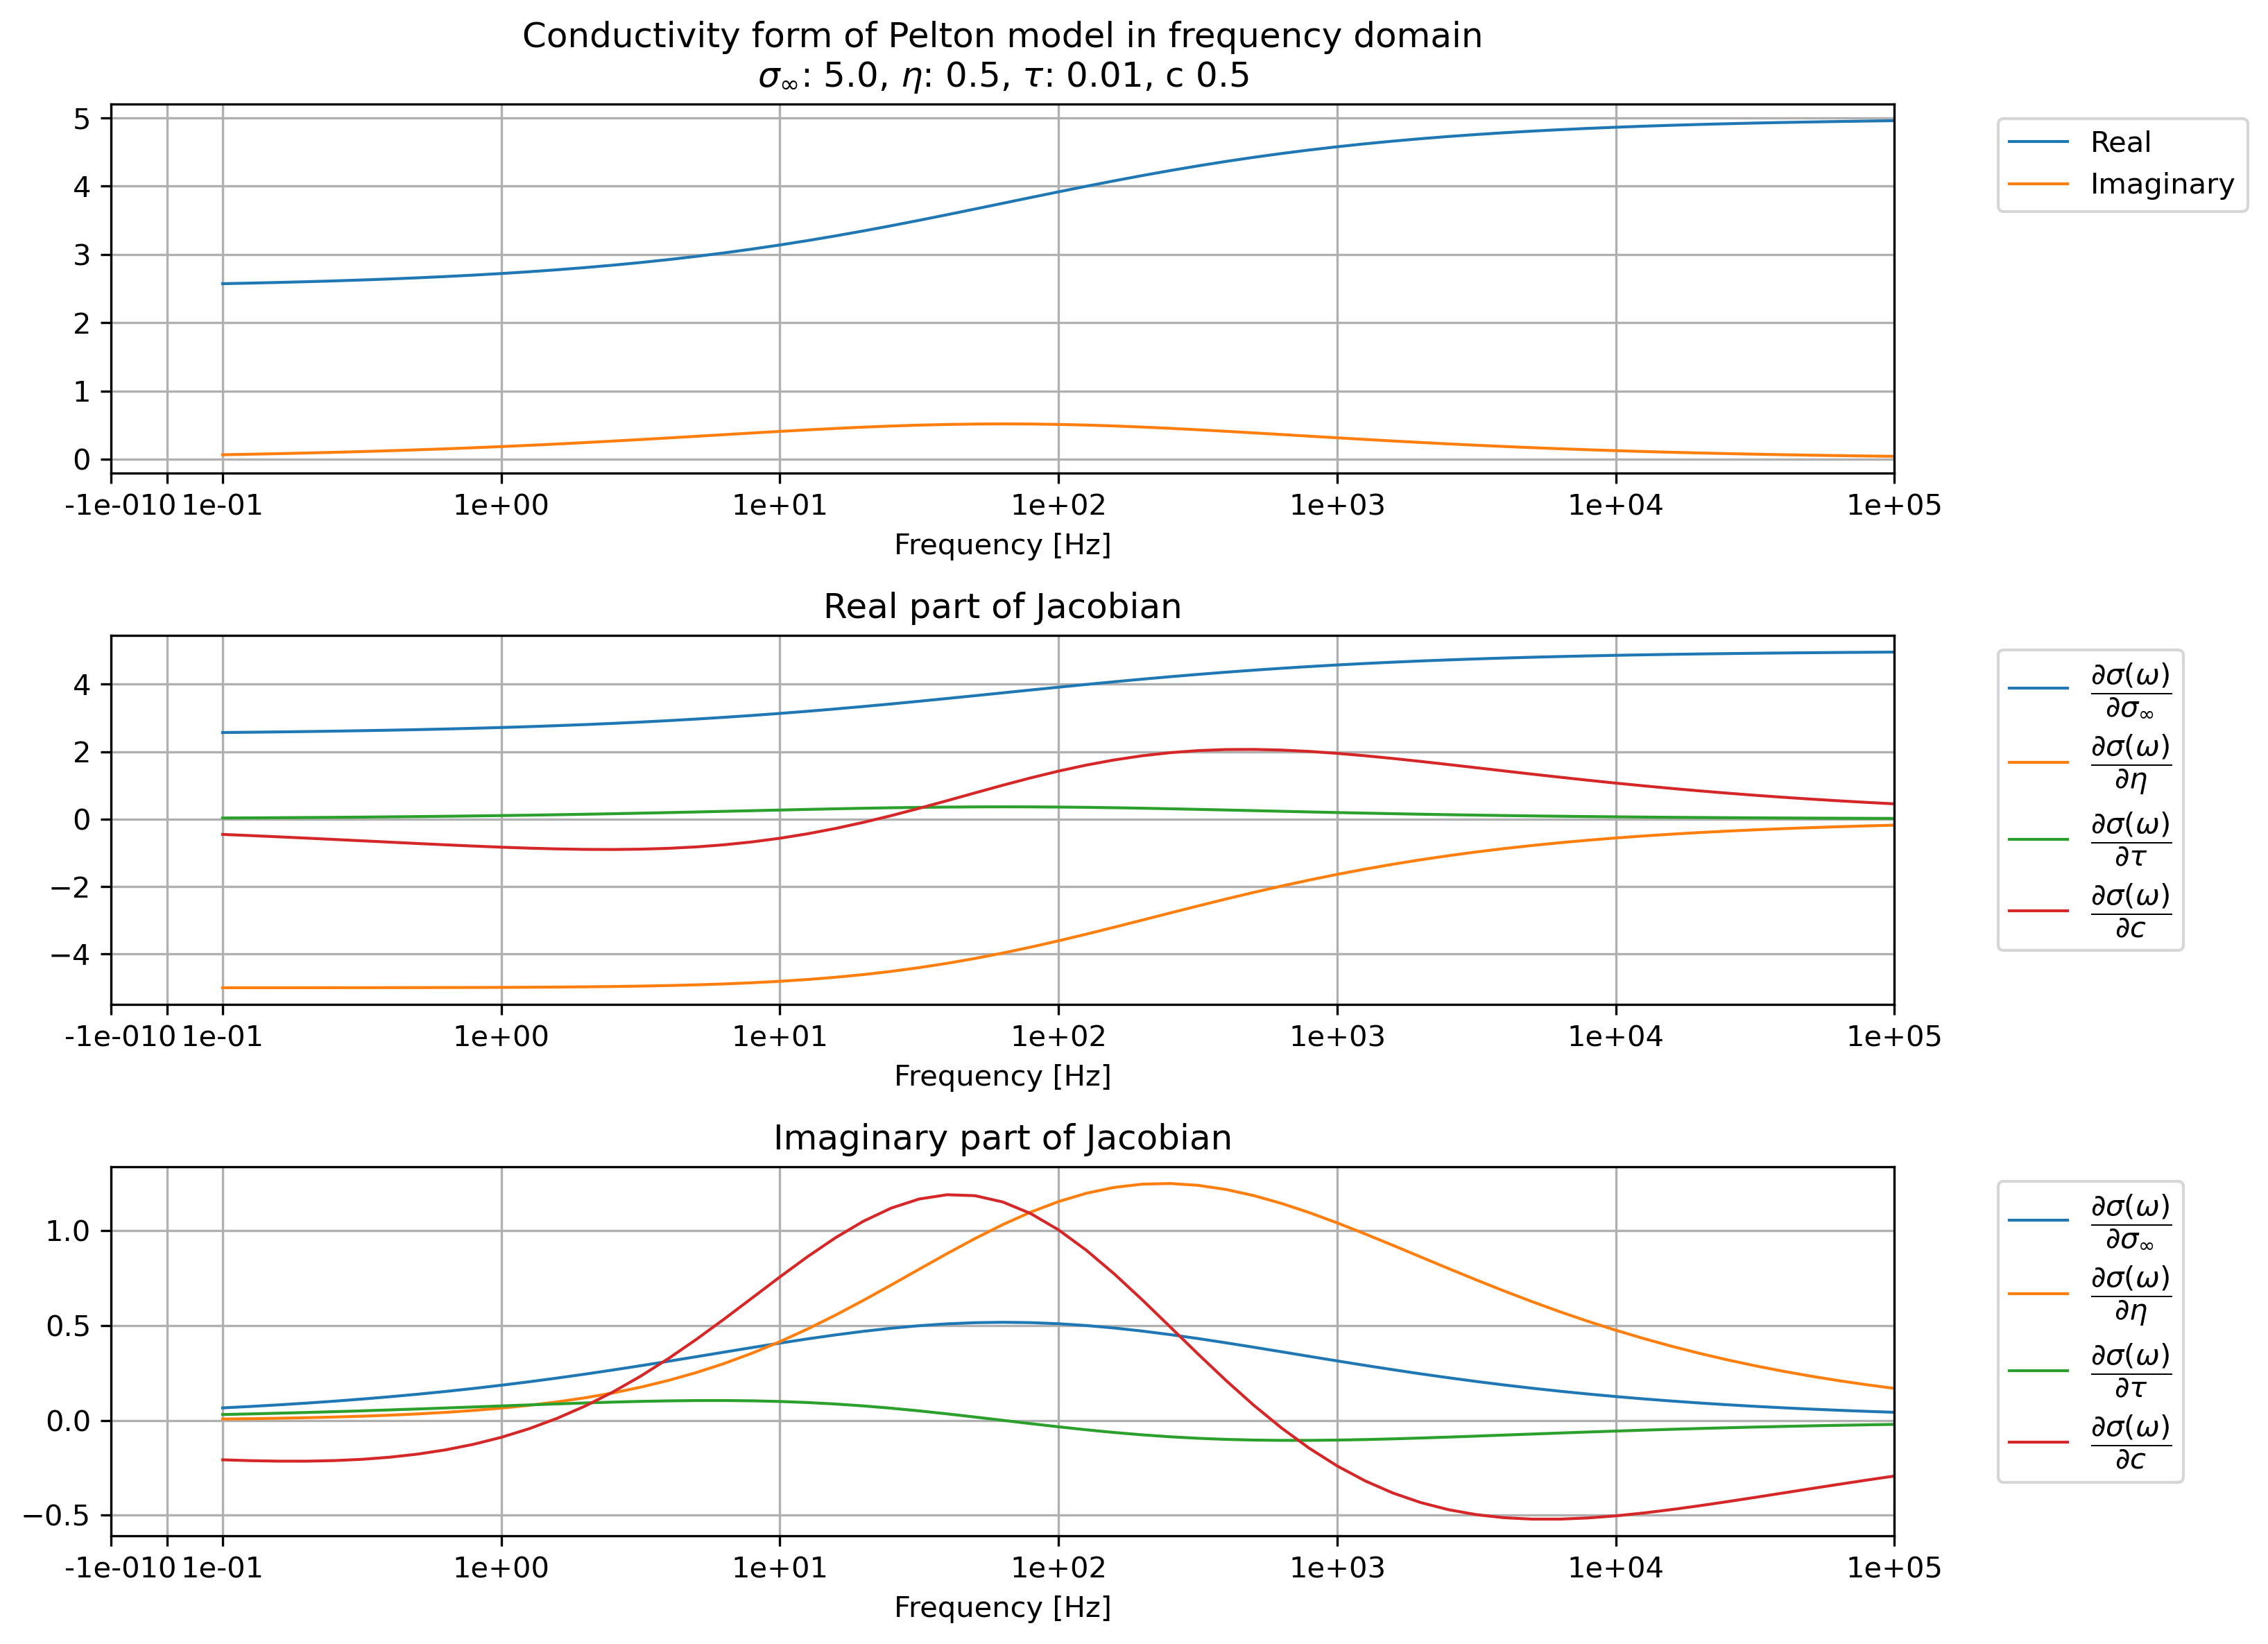

In [81]:
fig, ax = plt.subplots(3, 1, figsize=(11, 8),dpi=300)
ax[0] = PL_pelton.semiplx(x=freq_plot, y=dpred_f_plot_real, ax=ax[0], yscale_log=False,
                          color = "C0",label="Real")
ax[0] = PL_pelton.semiplx(x=freq_plot, y=dpred_f_plot_imag, ax=ax[0], yscale_log=False,
                            color = "C1",label="Imaginary")
PL_pelton.pl_axes_x(ax=ax[0])
ax[1] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_real[:,0], ax=ax[1], yscale_log=False,
                color = "C0",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \sigma_\infty}$")
ax[1] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_real[:,1], ax=ax[1], yscale_log=False,
                color = "C1",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \eta}$")
ax[1] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_real[:,2], ax=ax[1], yscale_log=False,
                color = "C2",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \tau}$")
ax[1] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_real[:,3], ax=ax[1], yscale_log=False,
                color = "C3",label=r"$\dfrac{\partial \sigma(\omega)}{\partial c}$")
PL_jac.pl_axes_x(ax=ax[1])
ax[2] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_imag[:,0], ax=ax[2], yscale_log=False,
                color = "C0",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \sigma_\infty}$")
ax[2] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_imag[:,1], ax=ax[2], yscale_log=False,
                color = "C1",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \eta}$")       
ax[2] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_imag[:,2], ax=ax[2], yscale_log=False,
                color = "C2",label=r"$\dfrac{\partial \sigma(\omega)}{\partial \tau}$")
ax[2] = PL_jac.semiplx(x=freq_plot, y=J_f_plot_imag[:,3], ax=ax[2], yscale_log=False,
                color = "C3",label=r"$\dfrac{\partial \sigma(\omega)}{\partial c}$")
PL_jac.pl_axes_x(ax=ax[2])
for a in ax:
        a.set_xlabel('Frequency [Hz]')
        a.grid()
        a.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

ax[0].set_title(fr"""Conductivity form of Pelton model in frequency domain
$\sigma_\infty$: {con8}, $\eta$: {eta}, $\tau$: {tau}, c {expc}""")
ax[1].set_title('Real part of Jacobian')
ax[2].set_title('Imaginary part of Jacobian')
plt.tight_layout()

In [82]:
U, S_f, Vh = np.linalg.svd(J_f_plot)
print(S_f)

[38.59633    18.224222    6.135115    0.69813454]


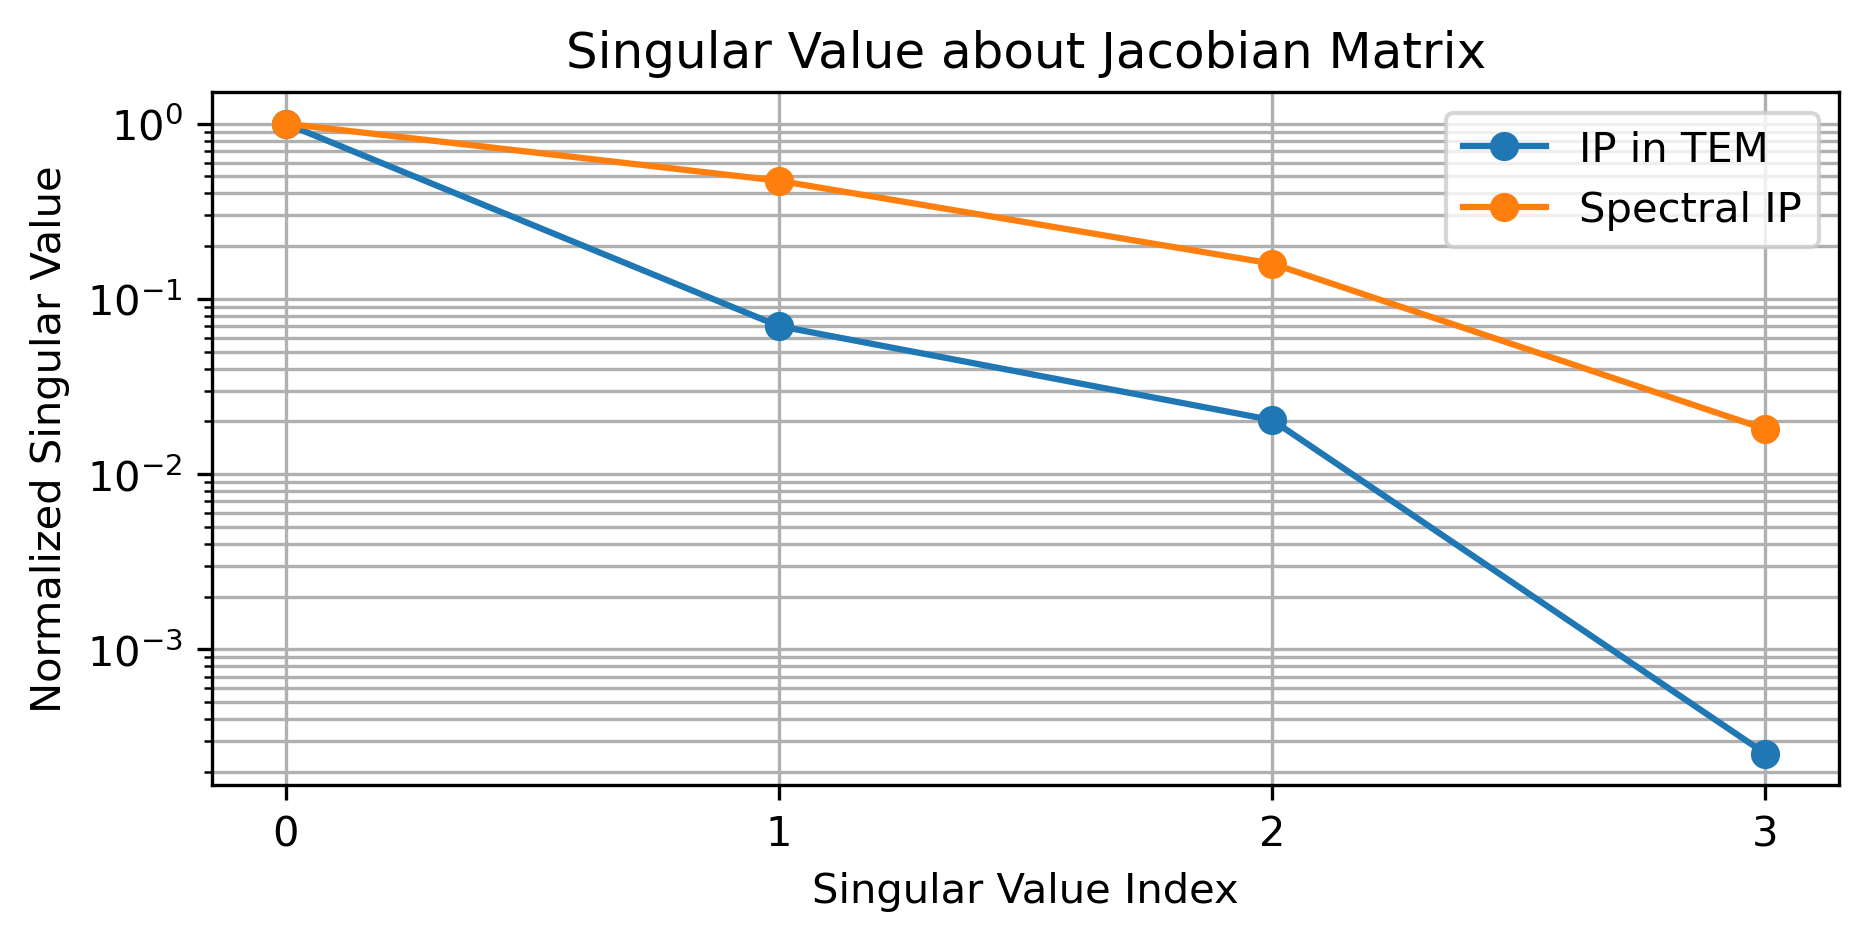

In [86]:
plt.figure(figsize=(7, 3),dpi=300)
plt.plot(S_l/S_l.max(), label="IP in TEM", marker="o")
plt.plot(S_f/S_f.max(), label="Spectral IP", marker="o")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both")
plt.xticks(np.arange(0, S_l.shape[0], 1))
plt.xlabel("Singular Value Index")
plt.ylabel("Normalized Singular Value")
plt.title("Singular Value about Jacobian Matrix")
plt.show()

In [27]:
print(J_l.shape)

(41, 4)


In [28]:
print(J_s.shape)

(21, 4)
